In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import tqdm
import json

### Setting Directory

In [2]:

image_dir = 'D:\Dissertation\Preprocessing\helioviewer_images'
# Path to the JSON file
file_path = 'D:\\Dissertation\\Kp data\\kpdata.json'




### Opening Kp and converting to Dataframe
#### Export as CSV

In [3]:
# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert datetime and Kp values to numpy arrays
datetime_array = np.array(data['datetime'])
Kp = np.array(data['Kp'])

df = pd.DataFrame({'datetime': datetime_array, 'Kp': Kp})
print(df.head())

df.to_csv('D:\\Dissertation\\Kp data\\kpdata.csv', index=False)

               datetime     Kp
0  2011-01-01T00:00:00Z  1.333
1  2011-01-01T03:00:00Z  0.667
2  2011-01-01T06:00:00Z  0.000
3  2011-01-01T09:00:00Z  0.667
4  2011-01-01T12:00:00Z  1.000


### Making list of images

In [53]:
# List all files in the image directory
image_files = []
for root, dirs, files in os.walk(image_dir):
    for d in dirs:
        image_directory = os.path.join(root, d)
        # image_files += [os.path.join(image_directory, f).replace('D:\\Dissertation\\Preprocessing\\', '/content/') for f in os.listdir(image_directory) if f.endswith('.jp2')]
        # image_files = [f.replace('\\', '/') for f in image_files]
        image_files += [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jp2')]
print(f'Found {len(image_files)} Image files')
print(image_files[:5])

Found 122736 Image files
['D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_000000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_010000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_020000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_030000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_040000.jp2']


### Grouping images by 10

In [54]:
count = 0
group = []
for i in range(0, len(image_files), 10):
    group += [image_files[i:i+10]]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])
group = group[0: -1]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])

12274
10
6
[['D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_000000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_010000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_020000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_030000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_040000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_050000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_060000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_070000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_080000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_090000.jp2'], ['D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_100000.j

In [56]:
list_of_dates = []
for i in group:
    last_image = i[-1].split('\\')[-1]
    year = last_image[8:12]
    month = last_image[12:14]
    day = last_image[14:16]
    hour = last_image[17:19]
    date = datetime.datetime(int(year), int(month), int(day), int(hour))
    list_of_dates.append(date)
print(len(list_of_dates))
for date in list_of_dates:
    print(date)

12273
2011-01-01 09:00:00
2011-01-01 19:00:00
2011-01-02 05:00:00
2011-01-02 15:00:00
2011-01-03 01:00:00
2011-01-03 11:00:00
2011-01-03 21:00:00
2011-01-04 07:00:00
2011-01-04 17:00:00
2011-01-05 03:00:00
2011-01-05 13:00:00
2011-01-05 23:00:00
2011-01-06 09:00:00
2011-01-06 19:00:00
2011-01-07 05:00:00
2011-01-07 15:00:00
2011-01-08 01:00:00
2011-01-08 11:00:00
2011-01-08 21:00:00
2011-01-09 07:00:00
2011-01-09 17:00:00
2011-01-10 03:00:00
2011-01-10 13:00:00
2011-01-10 23:00:00
2011-01-11 09:00:00
2011-01-11 19:00:00
2011-01-12 05:00:00
2011-01-12 15:00:00
2011-01-13 01:00:00
2011-01-13 11:00:00
2011-01-13 21:00:00
2011-01-14 07:00:00
2011-01-14 17:00:00
2011-01-15 03:00:00
2011-01-15 13:00:00
2011-01-15 23:00:00
2011-01-16 09:00:00
2011-01-16 19:00:00
2011-01-17 05:00:00
2011-01-17 15:00:00
2011-01-18 01:00:00
2011-01-18 11:00:00
2011-01-18 21:00:00
2011-01-19 07:00:00
2011-01-19 17:00:00
2011-01-20 03:00:00
2011-01-20 13:00:00
2011-01-20 23:00:00
2011-01-21 09:00:00
2011-01-21 19:

In [57]:
matched_kp = []
matched_kp_index = []
# Convert datetime column to datetime type if it's not already and remove timezone information
df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
for i in range(len(list_of_dates)):
    date = list_of_dates[i]
    date = date + datetime.timedelta(days=2)
    match = df[df['datetime'] >= date][0:1]
    if match.empty:
        print(f'No match found for {date}')
    matched_kp += match['datetime'].tolist()
    matched_kp_index += match.index.tolist()
    
print(len(matched_kp))
print(len(matched_kp_index))
print(matched_kp[:5])
print(list_of_dates[:5])

12273
12273
[Timestamp('2011-01-03 09:00:00'), Timestamp('2011-01-03 21:00:00'), Timestamp('2011-01-04 06:00:00'), Timestamp('2011-01-04 15:00:00'), Timestamp('2011-01-05 03:00:00')]
[datetime.datetime(2011, 1, 1, 9, 0), datetime.datetime(2011, 1, 1, 19, 0), datetime.datetime(2011, 1, 2, 5, 0), datetime.datetime(2011, 1, 2, 15, 0), datetime.datetime(2011, 1, 3, 1, 0)]


In [58]:
max_Kp_values = []
for index in matched_kp_index:
    kp_values = Kp[index: index + 9]
    max_Kp = max(kp_values)
    max_Kp_values.append(max_Kp)
print(len(max_Kp_values))  


12273


In [59]:
# Convert group to a DataFrame and export as CSV
group_df = pd.DataFrame({'Images': group, 'Kp': max_Kp_values})
group_df.to_csv('D:\\dataset.csv', index=False)



C:\Users\mirzi\AppData\Local\Temp\ipykernel_1884\1263773065.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_kp = date_and_kp.set_index('datetime').resample('M')['Kp'].max()


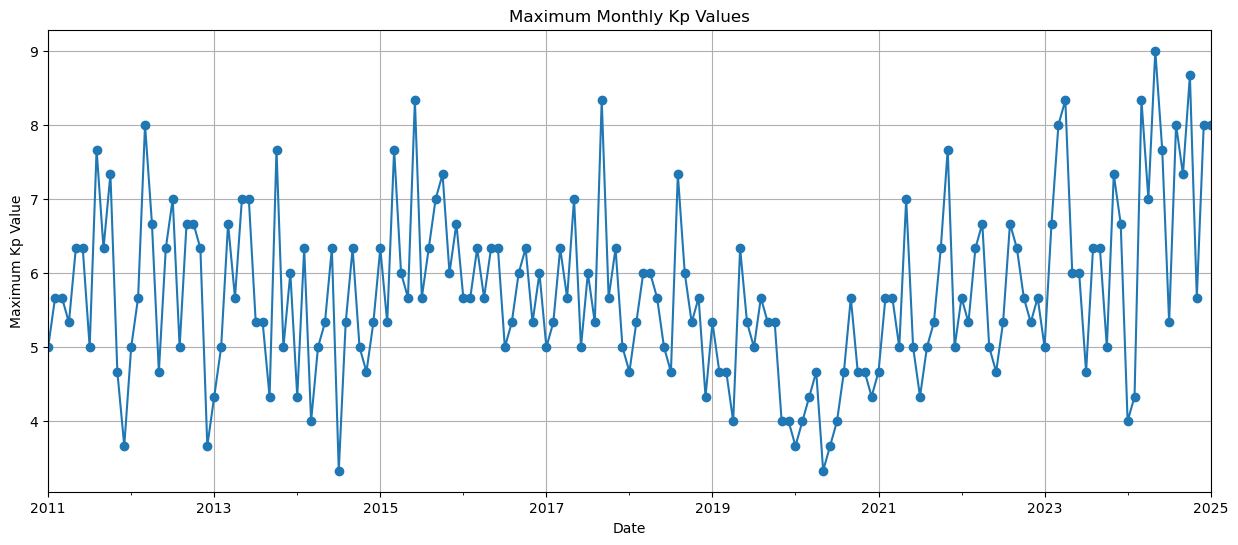

In [ ]:
date_and_kp = pd.DataFrame({'datetime': matched_kp, 'Kp': max_Kp_values})

import matplotlib.pyplot as plt

# Convert datetime to datetime type if not already
date_and_kp['datetime'] = pd.to_datetime(date_and_kp['datetime'])

# Extract month-year and calculate monthly max Kp
monthly_kp = date_and_kp.set_index('datetime').resample('M')['Kp'].max()

# Create the plot
plt.figure(figsize=(15, 6))
monthly_kp.plot(kind='line', marker='o')
plt.title('Maximum Monthly Kp Values')
plt.xlabel('Date')
plt.ylabel('Maximum Kp Value')
plt.grid(True)

Kp Statistics:
Mean: 2.870
Variance: 1.794
Standard Deviation: 1.339


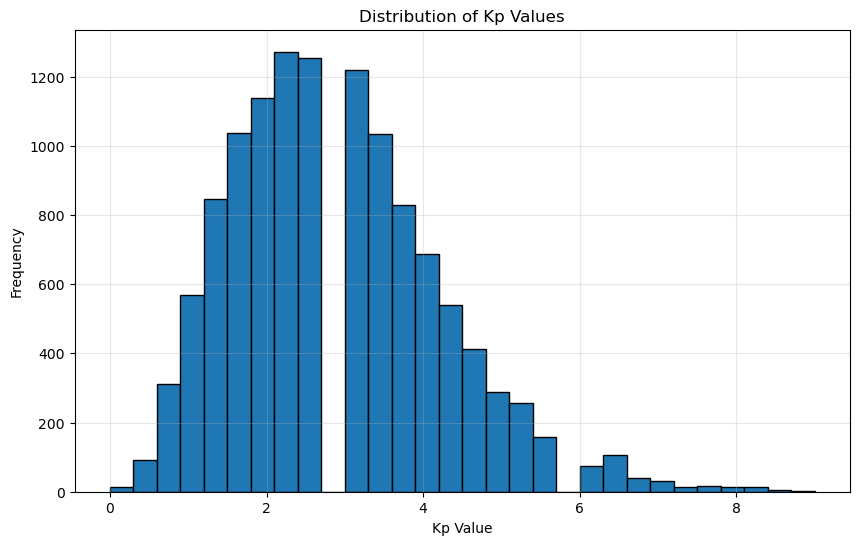

In [38]:
# Calculate statistics
kp_mean = date_and_kp['Kp'].mean()
kp_var = date_and_kp['Kp'].var()
kp_std = date_and_kp['Kp'].std()

print(f"Kp Statistics:")
print(f"Mean: {kp_mean:.3f}")
print(f"Variance: {kp_var:.3f}")
print(f"Standard Deviation: {kp_std:.3f}")

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(date_and_kp['Kp'], bins=30, edgecolor='black')
plt.title('Distribution of Kp Values')
plt.xlabel('Kp Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

Filtered Kp Statistics (Skipping Consecutive Months):
Mean: 5.718
Variance: 1.443
Standard Deviation: 1.201


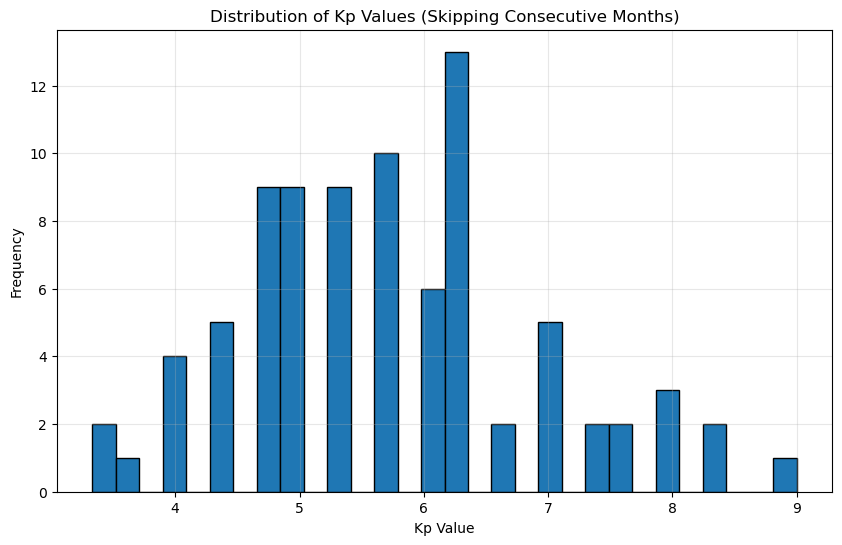

In [39]:
# Filter to include only every other month
filtered_monthly_kp = monthly_kp[::2]

# Calculate statistics
filtered_kp_mean = filtered_monthly_kp.mean()
filtered_kp_var = filtered_monthly_kp.var()
filtered_kp_std = filtered_monthly_kp.std()

print(f"Filtered Kp Statistics (Skipping Consecutive Months):")
print(f"Mean: {filtered_kp_mean:.3f}")
print(f"Variance: {filtered_kp_var:.3f}")
print(f"Standard Deviation: {filtered_kp_std:.3f}")

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_monthly_kp, bins=30, edgecolor='black')
plt.title('Distribution of Kp Values (Skipping Consecutive Months)')
plt.xlabel('Kp Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

Filtered Kp Statistics (Skipping Alternate Years):
Mean: 7.792
Variance: 0.442
Standard Deviation: 0.665


C:\Users\mirzi\AppData\Local\Temp\ipykernel_1884\2307037281.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  filtered_yearly_kp = monthly_kp.groupby(pd.Grouper(freq='Y')).max()[::2]


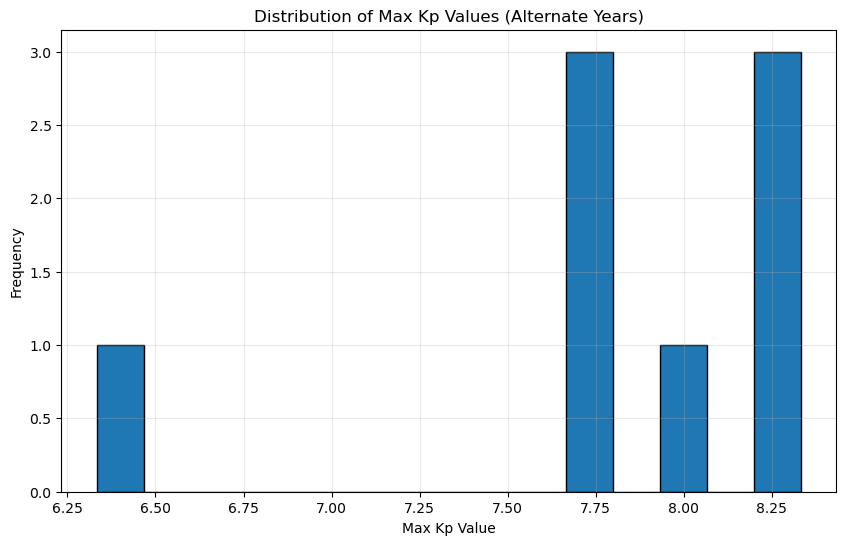

In [40]:
# Filter to include only every other year
filtered_yearly_kp = monthly_kp.groupby(pd.Grouper(freq='Y')).max()[::2]

# Calculate statistics
filtered_yearly_mean = filtered_yearly_kp.mean()
filtered_yearly_var = filtered_yearly_kp.var()
filtered_yearly_std = filtered_yearly_kp.std()

print(f"Filtered Kp Statistics (Skipping Alternate Years):")
print(f"Mean: {filtered_yearly_mean:.3f}")
print(f"Variance: {filtered_yearly_var:.3f}")
print(f"Standard Deviation: {filtered_yearly_std:.3f}")

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_yearly_kp, bins=15, edgecolor='black')
plt.title('Distribution of Max Kp Values (Alternate Years)')
plt.xlabel('Max Kp Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

Filtered Kp Statistics (Skipping Every Other Day):
Mean: 3.141
Variance: 1.839
Standard Deviation: 1.356


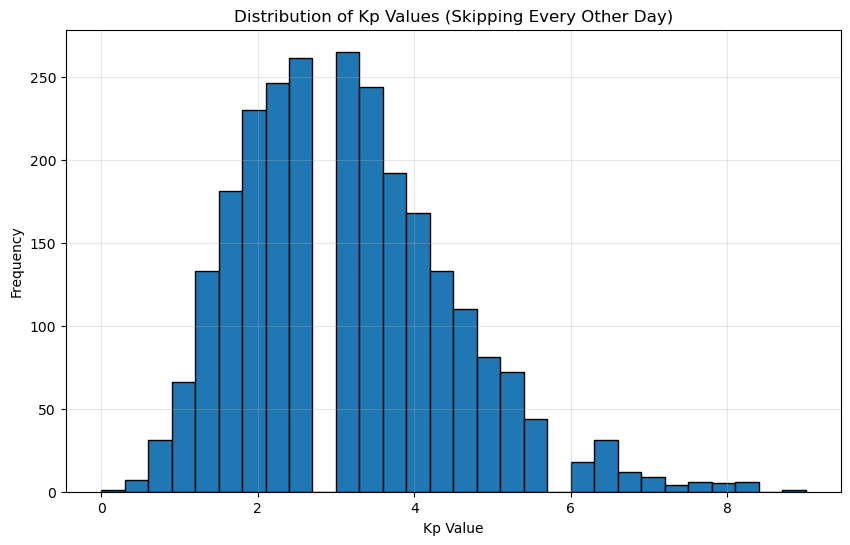

In [41]:
# Resample to daily frequency and take the maximum Kp value for each day
daily_kp = date_and_kp.set_index('datetime').resample('D')['Kp'].max()

# Filter to include only every other day
filtered_daily_kp = daily_kp[::2]

# Calculate statistics
filtered_daily_mean = filtered_daily_kp.mean()
filtered_daily_var = filtered_daily_kp.var()
filtered_daily_std = filtered_daily_kp.std()

print(f"Filtered Kp Statistics (Skipping Every Other Day):")
print(f"Mean: {filtered_daily_mean:.3f}")
print(f"Variance: {filtered_daily_var:.3f}")
print(f"Standard Deviation: {filtered_daily_std:.3f}")

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_daily_kp, bins=30, edgecolor='black')
plt.title('Distribution of Kp Values (Skipping Every Other Day)')
plt.xlabel('Kp Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

Filtered Kp Statistics (Skipping Every Other Day):
Mean: 2.861
Variance: 1.726
Standard Deviation: 1.314


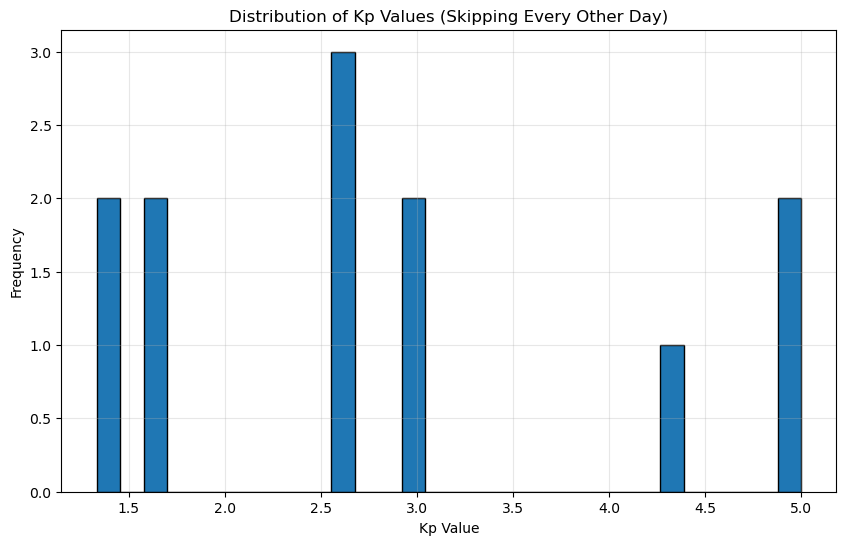

In [51]:
new_kp = date_and_kp['Kp'][:12]

filtered_daily_mean = new_kp.mean()
filtered_daily_var = new_kp.var()
filtered_daily_std = new_kp.std()

print(f"Filtered Kp Statistics (Skipping Every Other Day):")
print(f"Mean: {filtered_daily_mean:.3f}")
print(f"Variance: {filtered_daily_var:.3f}")
print(f"Standard Deviation: {filtered_daily_std:.3f}")

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(new_kp, bins=30, edgecolor='black')
plt.title('Distribution of Kp Values (Skipping Every Other Day)')
plt.xlabel('Kp Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

In [60]:
group_df = group_df[::12]
print(len(group_df))
group_df.to_csv('D:\\dataset.csv', index=False)

1023
